In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

In [5]:
DATA_PATH = "../data/raw/"

sales = pd.read_csv(DATA_PATH + "sales_train_validation.csv")
calendar = pd.read_csv(DATA_PATH + "calendar.csv")
prices = pd.read_csv(DATA_PATH + "sell_prices.csv")

print("Sales shape:", sales.shape)
print("Calendar shape:", calendar.shape)
print("Prices shape:", prices.shape)

Sales shape: (30490, 1919)
Calendar shape: (1969, 14)
Prices shape: (6841121, 4)


In [7]:
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     2     0     0     0     2     0     1     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     2     0     1     0     0     1     1     1     0     2     3   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     1     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     2     3     0     2     0     0     2   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   


In [9]:
TARGET_STATE = "CA"
TARGET_STORES = ["CA_1", "CA_2"]

filtered_sales = sales[
    (sales["state_id"] == TARGET_STATE) &
    (sales["store_id"].isin(TARGET_STORES))
]

print("Filtered sales shape:", filtered_sales.shape)

Filtered sales shape: (6098, 1919)


In [10]:
sales_cols = [c for c in filtered_sales.columns if c.startswith("d_")]

filtered_sales["total_sales"] = filtered_sales[sales_cols].sum(axis=1)

top_products = (
    filtered_sales
    .sort_values("total_sales", ascending=False)
    .head(5)
)

top_products[["id", "item_id", "store_id", "total_sales"]]

/var/folders/_5/lhgf4k0s56n7209fth8ll2200000gn/T/ipykernel_32077/354344630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales["total_sales"] = filtered_sales[sales_cols].sum(axis=1)


,id,item_id,store_id,total_sales
2314,FOODS_3_090_CA_1_validation,FOODS_3_090,CA_1,127203
2810,FOODS_3_586_CA_1_validation,FOODS_3_586,CA_1,87691
2476,FOODS_3_252_CA_1_validation,FOODS_3_252,CA_1,74971
5859,FOODS_3_586_CA_2_validation,FOODS_3_586,CA_2,63416
2344,FOODS_3_120_CA_1_validation,FOODS_3_120,CA_1,61899


In [11]:
ts_data = top_products.melt(
    id_vars=["id", "item_id", "dept_id", "store_id", "state_id"],
    value_vars=sales_cols,
    var_name="d",
    value_name="sales"
)

ts_data.head()

,id,item_id,dept_id,store_id,state_id,d,sales
0,FOODS_3_090_CA_1_validation,FOODS_3_090,FOODS_3,CA_1,CA,d_1,107
1,FOODS_3_586_CA_1_validation,FOODS_3_586,FOODS_3,CA_1,CA,d_1,42
2,FOODS_3_252_CA_1_validation,FOODS_3_252,FOODS_3,CA_1,CA,d_1,19
3,FOODS_3_586_CA_2_validation,FOODS_3_586,FOODS_3,CA_2,CA,d_1,34
4,FOODS_3_120_CA_1_validation,FOODS_3_120,FOODS_3,CA_1,CA,d_1,0


In [12]:
calendar_subset = calendar[["d", "date", "weekday", "wday", "month", "year", "event_name_1"]]

ts_data = ts_data.merge(calendar_subset, on="d", how="left")

ts_data["date"] = pd.to_datetime(ts_data["date"])

ts_data.head()

,id,item_id,dept_id,store_id,state_id,d,sales,date,weekday,wday,month,year,event_name_1
0,FOODS_3_090_CA_1_validation,FOODS_3_090,FOODS_3,CA_1,CA,d_1,107,2011-01-29,Saturday,1,1,2011,NaN
1,FOODS_3_586_CA_1_validation,FOODS_3_586,FOODS_3,CA_1,CA,d_1,42,2011-01-29,Saturday,1,1,2011,NaN
2,FOODS_3_252_CA_1_validation,FOODS_3_252,FOODS_3,CA_1,CA,d_1,19,2011-01-29,Saturday,1,1,2011,NaN
3,FOODS_3_586_CA_2_validation,FOODS_3_586,FOODS_3,CA_2,CA,d_1,34,2011-01-29,Saturday,1,1,2011,NaN
4,FOODS_3_120_CA_1_validation,FOODS_3_120,FOODS_3,CA_1,CA,d_1,0,2011-01-29,Saturday,1,1,2011,NaN


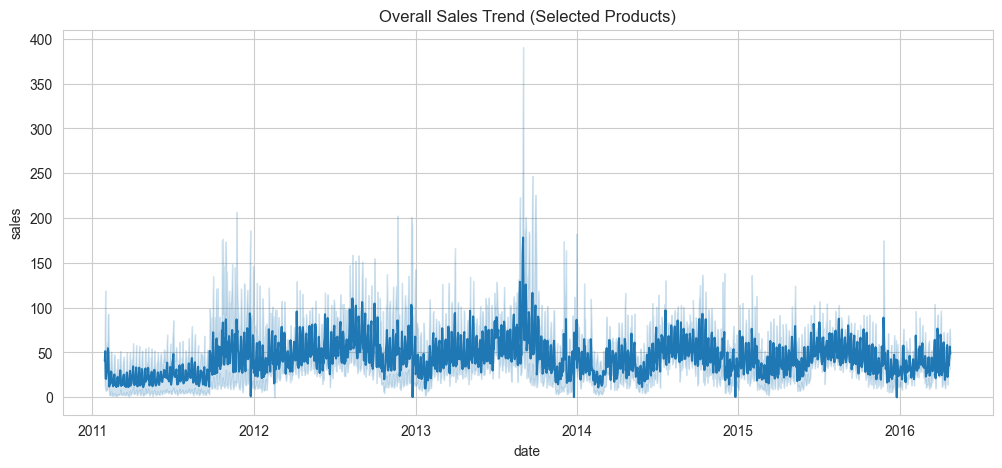

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(data=ts_data, x="date", y="sales")
plt.title("Overall Sales Trend (Selected Products)")
plt.show()

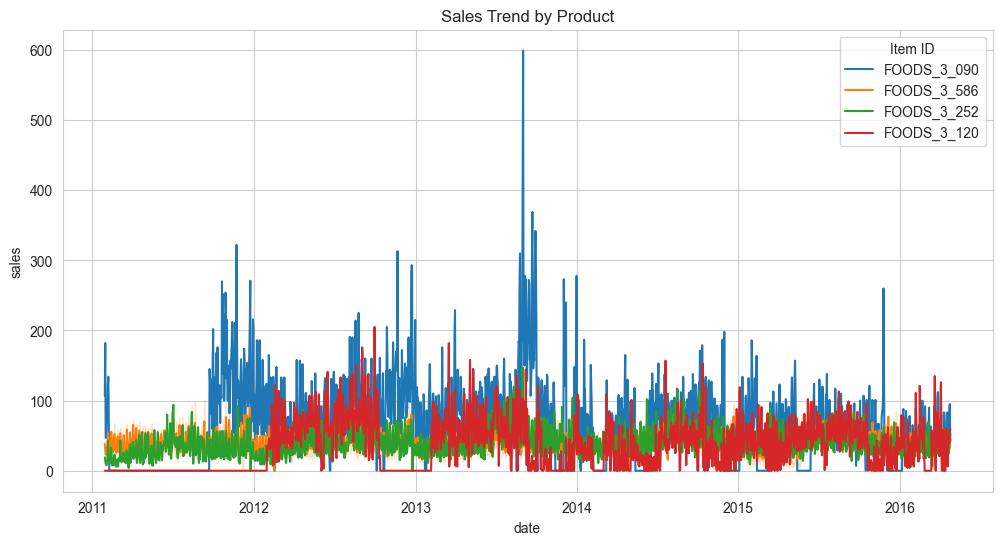

In [17]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=ts_data,
    x="date",
    y="sales",
    hue="item_id"
)
plt.title("Sales Trend by Product")
plt.legend(title="Item ID")
plt.show()

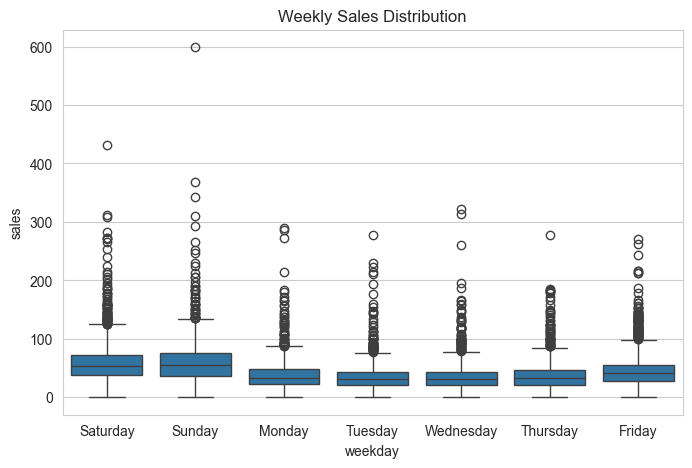

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=ts_data, x="weekday", y="sales")
plt.title("Weekly Sales Distribution")
plt.show()

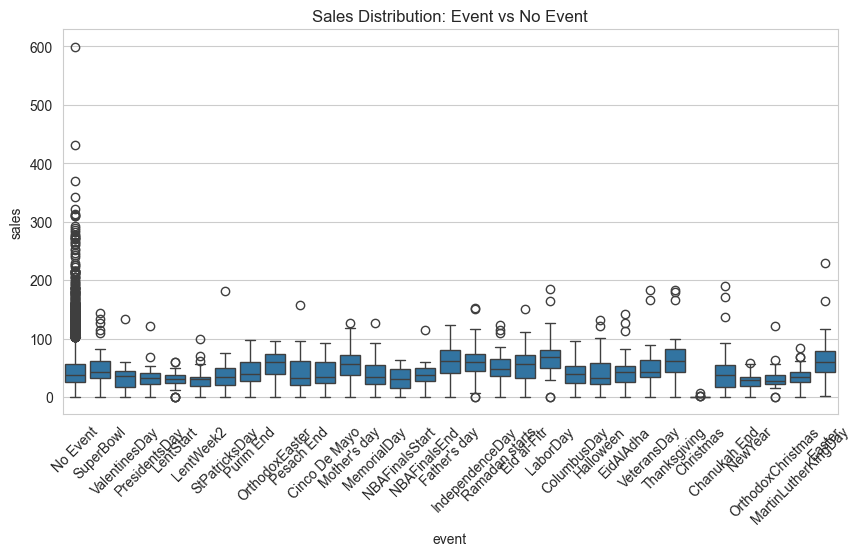

In [18]:
event_sales = ts_data.copy()
event_sales["event"] = event_sales["event_name_1"].fillna("No Event")

plt.figure(figsize=(10,5))
sns.boxplot(data=event_sales, x="event", y="sales")
plt.xticks(rotation=45)
plt.title("Sales Distribution: Event vs No Event")
plt.show()

In [19]:
OUTPUT_PATH = "../data/processed/"

ts_data.to_csv(OUTPUT_PATH + "m5_ts_subset.csv", index=False)

print("Saved processed dataset")

Saved processed dataset
